In [ ]:
import numpy as np 

def calc_growth (RUE, light_intensity , photoperiod,tempreture, ph, ec  , rh , water_duration , n_cycles ) : 
    growth = 0 # initial growth 

    #constants optimal 
    dli_optimal =8  # function of light 
    tempreture_optimal = 25 
    ph_optimal = 6.4
    ec_optimal = 1.4
    rh_optimal = 55
    water_duration_optimal = 1.5 # 1.5hr
    n_cycles_optimal = 5


    # constants sigma 
    dli_sigma = 3
    tempreture_sigma =8
    ph_sigma = 0.7
    ec_sigma = 0.8
    rh_sigma = 15.8
    water_duration_sigma =0.8 
    n_cycles_sigma =  1.5

    #light 
    ppfd = light_intensity*0.0185
    DLI = ppfd*photoperiod*3600/1000000

    f_light = factor_function(dli_optimal,DLI,dli_sigma)

    # tempreture 
    f_temp = factor_function(tempreture_optimal ,tempreture , tempreture_sigma)
    
    #ph 
    f_ph = factor_function(ph_optimal , ph, ph_sigma)

    #ec
    f_ec = factor_function(ec_optimal , ec , ec_sigma)

    # rh 
    f_rh = factor_function(rh_optimal , rh , rh_sigma)

    #water 
    f_water_duration = factor_function(water_duration_optimal ,water_duration , water_duration_sigma)
    f_n_cycles = factor_function (n_cycles_optimal , n_cycles , n_cycles_sigma)

    growth = RUE * f_light * f_temp * f_ph * f_ec * f_rh * f_water_duration * f_n_cycles  

    return growth


def factor_function (x_optimal , x , sigma_x): 
    return np.exp(-((x-x_optimal)**2)/(2*(sigma_x)**2))

In [16]:
# the best = RUE  * 120 (4 month )  
calc_growth(3.0 , 10000 , 6,25,7.5,2.0,60,1.0,4)

0.18458070780188549

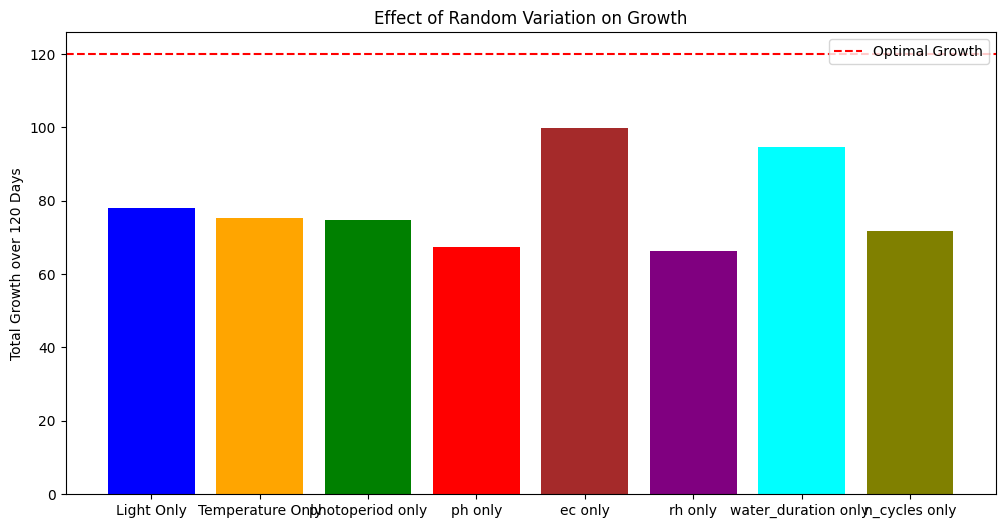

In [18]:
import matplotlib.pyplot as plt
RUE = 1

days = 120
optimal_growth = RUE * days

def simulate_random_variation(change_light=True, change_temp=True, change_photoperiod = True , change_ph = True , change_ec = True , change_rh = True ,
                              change_water_duration = True , change_n_cycles = True , trials=100):
    all_growths = []

    for trial in range(trials):
        daily_growths = []

        for day in range(days):
            light = np.random.uniform(2000, 15000) if change_light else 10000
            temp = np.random.uniform(10, 40) if change_temp else 25
            photoperiod = np.random.uniform(3,20) if change_photoperiod else 12 
            ph = np.random.uniform(5.0 , 8.0 ) if change_ph else 6.4 
            ec = np.random.uniform(0.8,2.5) if change_ec else 1.5 
            rh = np.random.uniform(20,90) if change_rh else 55 
            water_duration = np.random.uniform(0.5,2.5) if change_water_duration else 1.5 
            n_cycles = np.random.uniform(2,8) if change_n_cycles else 5

            

            g = calc_growth(RUE, light, photoperiod, temp, ph, ec, rh, water_duration, n_cycles)
            daily_growths.append(g)

        total_growth = np.sum(daily_growths)
        all_growths.append(total_growth)

    return all_growths

# just change light 
growth_light_only = simulate_random_variation(change_light=True, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

# just change tempreture 
growth_temp_only = simulate_random_variation(change_light=False, change_temp=True,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_photoperiod_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = True , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_ph_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = True , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_ec_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = True , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_rh_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = True ,
                              change_water_duration = False , change_n_cycles = False )

growth_water_duration_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = True , change_n_cycles = False )

growth_n_cycles_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = True )


# growth_both = simulate_random_variation(change_light=True, change_temp=True)

labels = ['Light Only', 'Temperature Only', 'photoperiod only', 'ph only', 'ec only' , 'rh only', 'water_duration only ' , 'n_cycles only']
means = [np.mean(growth_light_only), np.mean(growth_temp_only), np.mean(growth_photoperiod_only) , np.mean(growth_ph_only) , np.mean(growth_ec_only)
         , np.mean(growth_rh_only) , np.mean(growth_water_duration_only), np.mean(growth_n_cycles_only)]
plt.figure(figsize=(12, 6))
plt.bar(labels, means, color=['blue', 'orange','green' ,'red' , 'brown' , 'purple' ,'cyan' ,'olive'])
plt.axhline(optimal_growth, color='red', linestyle='--', label='Optimal Growth')
plt.ylabel('Total Growth over 120 Days')
plt.title('Effect of Random Variation on Growth')
plt.legend()
plt.show()



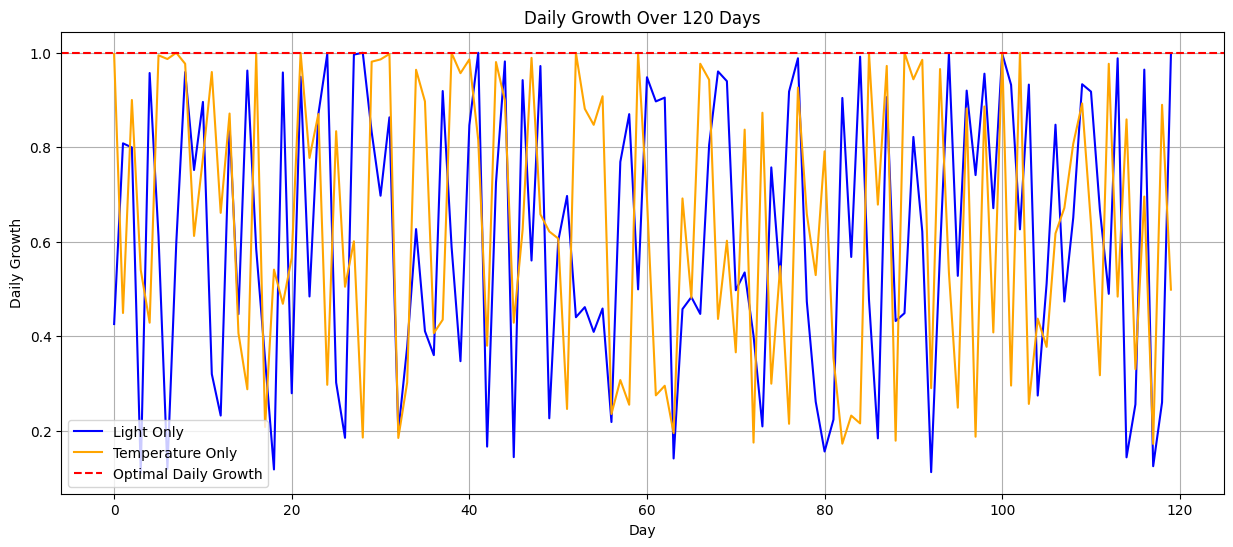

In [ ]:
def simulate_daily_growth(change_light=True, change_temp=True, change_photoperiod = True , change_ph = True , change_ec = True , change_rh = True ,
                              change_water_duration = True , change_n_cycles = True):
    daily_growths = []

    for day in range(days):
        light = np.random.uniform(2000, 15000) if change_light else 10000
        temp = np.random.uniform(10, 40) if change_temp else 25
        photoperiod = np.random.uniform(3,20) if change_photoperiod else 12 
        ph = np.random.uniform(5.0 , 8.0 ) if change_ph else 6.4 
        ec = np.random.uniform(0.8,2.5) if change_ec else 1.5 
        rh = np.random.uniform(30,90) if change_rh else 55 
        water_duration = np.random.uniform(0.5,2.5) if change_water_duration else 1.5 
        n_cycles = np.random.uniform(2,8) if change_n_cycles else 5

        g = calc_growth(RUE, light, photoperiod, temp, ph, ec, rh, water_duration, n_cycles)
        daily_growths.append(g)

    return daily_growths


daily_growth_light_only = simulate_daily_growth(change_light=True, change_temp=False, change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False)
daily_growth_temp_only = simulate_daily_growth(change_light=False, change_temp=True, change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False)
daily_growth_photoperiod_only = simulate_daily_growth(change_light=False, change_temp=False, change_photoperiod = True , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False)
daily_growth_ph_only = simulate_daily_growth(change_light=False, change_temp=False, change_photoperiod = False , change_ph = True , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False)
daily_growth_ec_only = simulate_daily_growth(change_light=False, change_temp=False, change_photoperiod = False , change_ph = False , change_ec = True , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False)
daily_growth_rh_only = simulate_daily_growth(change_light=False, change_temp=False, change_photoperiod = False , change_ph = False , change_ec = False , change_rh = True ,
                              change_water_duration = False , change_n_cycles = False)
daily_growth_water_duration_only = simulate_daily_growth(change_light=False, change_temp=False, change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = True , change_n_cycles = False)
daily_growth_n_cycles_only = simulate_daily_growth(change_light=False, change_temp=False, change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = True)

plt.figure(figsize=(15, 6))
plt.plot(daily_growth_light_only, label='Light Only', color='blue')
plt.plot(daily_growth_temp_only, label='Temperature Only', color='orange')
plt.plot(daily_growth_photoperiod_only, label='photoperiod Only', color='purple')
plt.plot(daily_growth_ph_only, label='ph Only', color='gray')
plt.plot(daily_growth_ec_only, label='ec Only', color='brown')
plt.plot(daily_growth_rh_only, label='rh Only', color='cyan')
plt.plot(daily_growth_water_duration_only, label='water duration Only', color='olive')
plt.plot(daily_growth_n_cycles_only, label='n cycles Only', color='green')

plt.axhline(RUE, color='red', linestyle='--', label='Optimal Daily Growth')
plt.xlabel('Day')
plt.ylabel('Daily Growth')
plt.title('Daily Growth Over 120 Days')
plt.legend()
plt.grid(True)
plt.show()

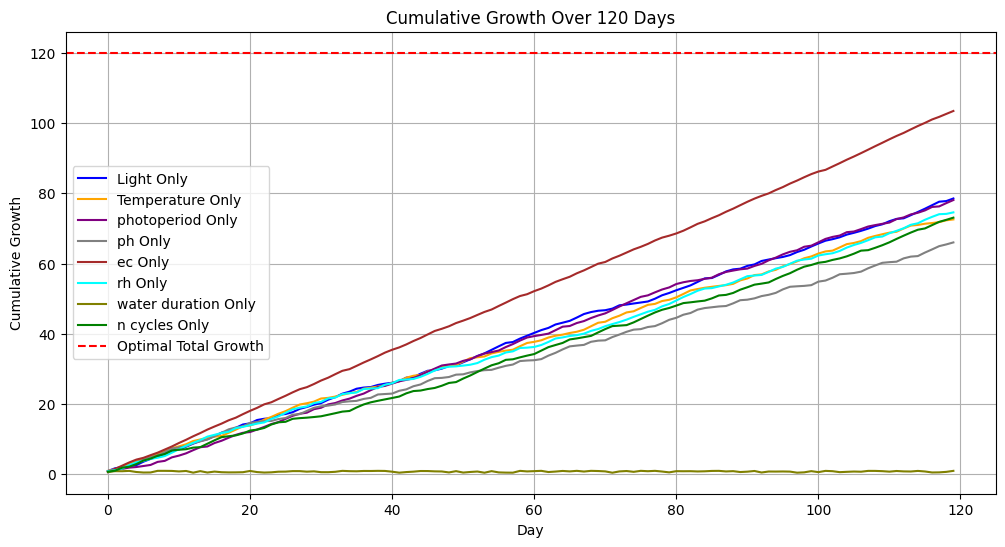

In [28]:
cumulative_growth_light_only = np.cumsum(daily_growth_light_only)
cumulative_growth_temp_only = np.cumsum(daily_growth_temp_only)
cumulative_growth_photoperiod_only = np.cumsum(daily_growth_photoperiod_only)
cumulative_growth_ph_only = np.cumsum(daily_growth_ph_only)
cumulative_growth_ec_only = np.cumsum(daily_growth_ec_only)
cumulative_growth_rh_only = np.cumsum(daily_growth_rh_only)
cumulative_growth_water_duration_only = np.cumsum(daily_growth_water_duration_only)
cumulative_growth_n_cycles_only = np.cumsum(daily_growth_n_cycles_only)


plt.figure(figsize=(12, 6))
plt.plot(cumulative_growth_light_only, label='Light Only', color='blue')
plt.plot(cumulative_growth_temp_only, label='Temperature Only', color='orange')
plt.plot(cumulative_growth_photoperiod_only, label='photoperiod Only', color='purple')
plt.plot(cumulative_growth_ph_only, label='ph Only', color='gray')
plt.plot(cumulative_growth_ec_only, label='ec Only', color='brown')
plt.plot(cumulative_growth_rh_only, label='rh Only', color='cyan')
plt.plot(daily_growth_water_duration_only, label='water duration Only', color='olive')
plt.plot(cumulative_growth_n_cycles_only, label='n cycles Only', color='green')
plt.axhline(optimal_growth, color='red', linestyle='--', label='Optimal Total Growth')
plt.xlabel('Day')
plt.ylabel('Cumulative Growth')
plt.title('Cumulative Growth Over 120 Days')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np 

def calc_growth_with_stages (stage,RUE, light_intensity , photoperiod,tempreture, ph, ec  , rh , water_duration , n_cycles ) : 
    growth = 0 # initial growth 

    # stages=[0,1,2,3,4]

    #constants optimal 
    dli_optimal =[8,8,8,8,8]
    tempreture_optimal = [25,25,25,25,25] 
    ph_optimal = [6.4,6.4,6.4,6.4,6.4]
    ec_optimal = [1.5,1.5,1.5,1.5,1.5]
    rh_optimal = [50,50,50,50,50]
    water_duration_optimal = [1.5,1.5,1.5,1.5,1.5] # 1.5hr
    n_cycles_optimal = [5,5,5,5,5]


    # constants sigma 
    dli_sigma = [3,3,3,3,3]
    tempreture_sigma =[8,8,8,8,8]
    ph_sigma = [0.7,0.7,0.7,0.7,0.7]
    ec_sigma = [0.8,0.8,0.8,0.8,0.8]
    rh_sigma = [15.8,15.8,15.8,15.8,15.8]
    water_duration_sigma =[0.8,0.8,0.8,0.8,0.8]
    n_cycles_sigma =  [1.5,1.5,1.5,1.5,1.5]



    #light 
    ppfd = light_intensity*0.0185
    DLI = ppfd*photoperiod*3600/1000000

    f_light = factor_function(dli_optimal[stage],DLI,dli_sigma[stage])

    # tempreture 
    f_temp = factor_function(tempreture_optimal[stage] ,tempreture , tempreture_sigma[stage])
    
    #ph 
    f_ph = factor_function(ph_optimal[stage], ph, ph_sigma[stage])

    #ec
    f_ec = factor_function(ec_optimal[stage] , ec , ec_sigma[stage])

    # rh 
    f_rh = factor_function(rh_optimal[stage] , rh , rh_sigma[stage])

    #water 
    f_water_duration = factor_function(water_duration_optimal[stage] ,water_duration , water_duration_sigma[stage])
    f_n_cycles = factor_function (n_cycles_optimal[stage] , n_cycles , n_cycles_sigma[stage])

    growth = RUE * f_light * f_temp * f_ph * f_ec * f_rh * f_water_duration * f_n_cycles  

    return growth


def factor_function (x_optimal , x , sigma_x): 
    return np.exp(-((x-x_optimal)**2)/(2*(sigma_x)**2))

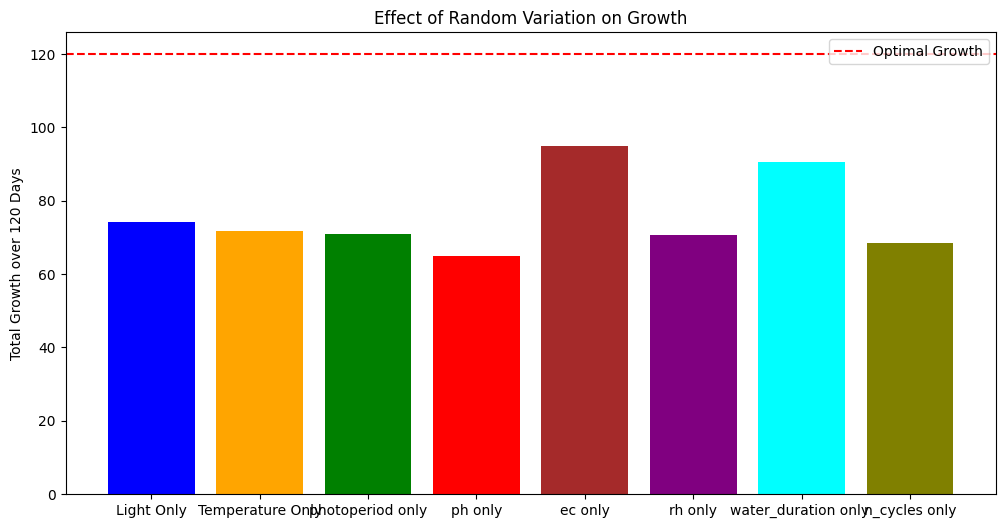

In [13]:
import matplotlib.pyplot as plt
RUE = 1

days = 120
optimal_growth = RUE * days
stage_days= days // 5

def simulate_random_variation(change_light=True, change_temp=True, change_photoperiod = True , change_ph = True , change_ec = True , change_rh = True ,
                              change_water_duration = True , change_n_cycles = True , trials=150):
    all_growths = []

    for trial in range(trials):
        daily_growths = []

        for day in range(days):
            stage = day//stage_days
            light = np.random.uniform(2000, 15000) if change_light else 10000
            temp = np.random.uniform(10, 40) if change_temp else 25
            photoperiod = np.random.uniform(3,20) if change_photoperiod else 12 
            ph = np.random.uniform(5.0 , 8.0 ) if change_ph else 6.4 
            ec = np.random.uniform(0.8,2.5) if change_ec else 1.5 
            rh = np.random.uniform(30,90) if change_rh else 55 
            water_duration = np.random.uniform(0.5,2.5) if change_water_duration else 1.5 
            n_cycles = np.random.uniform(2,8) if change_n_cycles else 5

            

            g = calc_growth_with_stages(stage ,RUE, light, photoperiod, temp, ph, ec, rh, water_duration, n_cycles)
            daily_growths.append(g)

        total_growth = np.sum(daily_growths)
        all_growths.append(total_growth)

    return all_growths

# just change light 
growth_light_only = simulate_random_variation(change_light=True, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

# just change tempreture 
growth_temp_only = simulate_random_variation(change_light=False, change_temp=True,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_photoperiod_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = True , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_ph_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = True , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_ec_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = True , change_rh = False ,
                              change_water_duration = False , change_n_cycles = False )

growth_rh_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = True ,
                              change_water_duration = False , change_n_cycles = False )

growth_water_duration_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = True , change_n_cycles = False )

growth_n_cycles_only = simulate_random_variation(change_light=False, change_temp=False,change_photoperiod = False , change_ph = False , change_ec = False , change_rh = False ,
                              change_water_duration = False , change_n_cycles = True )


# growth_both = simulate_random_variation(change_light=True, change_temp=True)

labels = ['Light Only', 'Temperature Only', 'photoperiod only', 'ph only', 'ec only' , 'rh only', 'water_duration only ' , 'n_cycles only']
means = [np.mean(growth_light_only), np.mean(growth_temp_only), np.mean(growth_photoperiod_only) , np.mean(growth_ph_only) , np.mean(growth_ec_only)
         , np.mean(growth_rh_only) , np.mean(growth_water_duration_only), np.mean(growth_n_cycles_only)]
plt.figure(figsize=(12, 6))
plt.bar(labels, means, color=['blue', 'orange','green' ,'red' , 'brown' , 'purple' ,'cyan' ,'olive'])
plt.axhline(optimal_growth, color='red', linestyle='--', label='Optimal Growth')
plt.ylabel('Total Growth over 120 Days')
plt.title('Effect of Random Variation on Growth')
plt.legend()
plt.show()



In [ ]:
import numpy as np
# optimal = 1.5  0-14
x_critical = 5
x_max = -5
gamma = 2.0

x = np.linspace(x_critical, x_max,11)  

f_x = ((x - x_critical) / (x_max - x_critical)) ** gamma

for xi, yi in zip(x, f_x): print(f"x = {xi:.2f}, f(x) = {yi:.4f}")


x = 5.00, f(x) = 0.0000
x = 4.00, f(x) = 0.0100
x = 3.00, f(x) = 0.0400
x = 2.00, f(x) = 0.0900
x = 1.00, f(x) = 0.1600
x = 0.00, f(x) = 0.2500
x = -1.00, f(x) = 0.3600
x = -2.00, f(x) = 0.4900
x = -3.00, f(x) = 0.6400
x = -4.00, f(x) = 0.8100
x = -5.00, f(x) = 1.0000


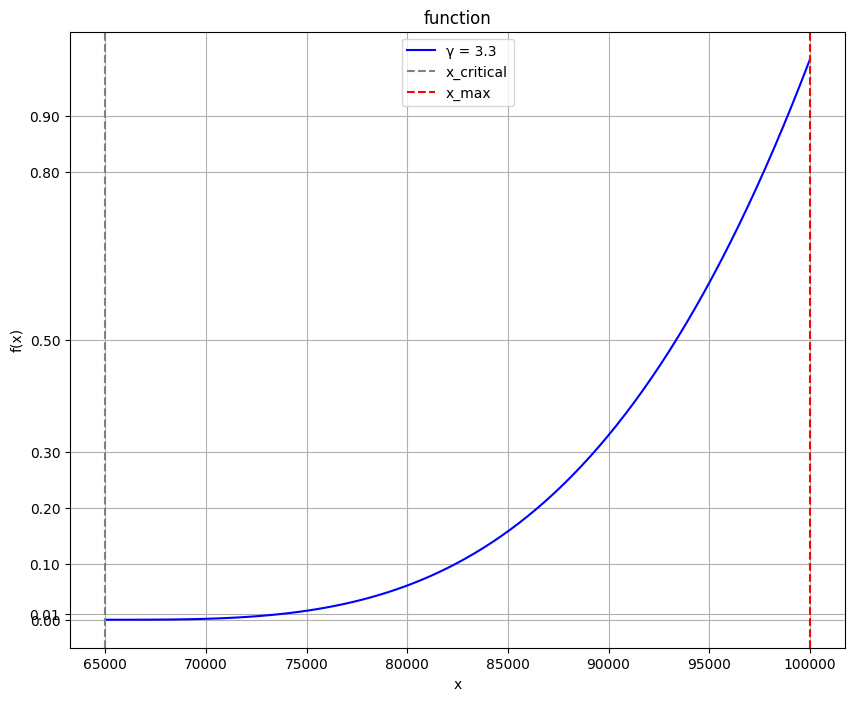

In [ ]:
gamma = 3.3
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(10, 8))

f_x = ((x - x_critical) / (x_max - x_critical)) ** gamma
plt.plot(x, f_x, label=f'γ = {gamma}', color='blue')
plt.yticks([0 0.01, 0.1, 0.2, 0.3,0.5,0.8,0.9])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('function')
plt.axvline(x_critical, color='gray', linestyle='--', label='x_critical')
plt.axvline(x_max, color='red', linestyle='--', label='x_max')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# [critical , max,gamma]
conditions_factors={
    # light indensity
    "light_I":{
    "light_I_optimal": 10000,
    "light_I_low" : [3000, -500,3] ,
    "light_I_high" : [65000,100000,5.2]},

    # light duration
    "light_D":{
    "light_D_optimal": 10,
    "light_D_low" : [5,-1,6.4] ,
    "light_D_high" : [14,30,2.3]},

    # temp
    "temp":{
    "temp_optimal": 25,
    "temp_low" : [7,-1,3.3] ,
    "temp_high" : [40,54,3.3]},
    
    # humidity
    "himidity":{
    "humidity_optimal": 55,
    "humidity_low" : [200,400,1] ,
    "humidity_high" : [200,400,1]},

    # ph
    "ph":{
    "ph_optimal": 6.4,
    "ph_low" : [4.4,1.8,2.0] ,
    "ph_high" : [8.2,10,2.2]},

    # ec
    "ec":{
    "ec_optimal": 1.4,
    "ec_low" : [0,0,2] ,
    "ec_high" : [12,12,2]},

    # total water duration (number of water cycels * hours per one cycle )
    "TWD":{
    "TWD_optimal": 7.5,
    "TWD_low" : [5,-5,2.0] ,
    "TWD_high" : [12,30,2]}

}

# state= []

def damage_loss (state=[],decay_coff=0,biomass=0): 
    D_t = sum(d_t(state[0],"light_I"), d_t(state[1],"light_D"), d_t(state[2],"temp"), d_t(state[3],"humidity")
              , d_t(state[4],"ph"), d_t(state[5],"ec"), d_t(state[6],"TWD"))


    return D_t

def d_t(condition,condition_name:str):
    conditions_factors={
    # light indensity
    "light_I":{
    "light_I_optimal": 10000,
    "light_I_low" : [3000, -500,3] ,
    "light_I_high" : [65000,100000,5.2]},

    # light duration
    "light_D":{
    "light_D_optimal": 10,
    "light_D_low" : [5,-1,6.4] ,
    "light_D_high" : [14,30,2.3]},

    # temp
    "temp":{
    "temp_optimal": 25,
    "temp_low" : [7,-1,3.3] ,
    "temp_high" : [40,54,3.3]},
    
    # humidity
    "himidity":{
    "humidity_optimal": 55,
    "humidity_low" : [200,400,1] ,
    "humidity_high" : [200,400,1]},

    # ph
    "ph":{
    "ph_optimal": 6.4,
    "ph_low" : [4.4,1.8,2.0] ,
    "ph_high" : [8.2,10,2.2]},

    # ec
    "ec":{
    "ec_optimal": 1.4,
    "ec_low" : [0,0,2] ,
    "ec_high" : [12,12,2]},

    # total water duration (number of water cycels * hours per one cycle )
    "TWD":{
    "TWD_optimal": 7.5,
    "TWD_low" : [5,-5,2.0] ,
    "TWD_high" : [12,30,2]}

    }
    flag = 0
    if condition < conditions_factors[condition_name][condition_name+"_optimal"] and condition < conditions_factors[condition_name][condition_name+"_low"][0] : 
        x_critical = conditions_factors[condition_name][condition_name+"_low"][0]
        x_max = conditions_factors[condition_name][condition_name+"_low"][1]
        gamma = conditions_factors[condition_name][condition_name+"_low"][2]
        flag = 1
        # print(condition_name, {x_critical})
    elif condition > conditions_factors[condition_name][condition_name+"_optimal"] and condition > conditions_factors[condition_name][condition_name+"_high"][0]:
        x_critical=conditions_factors[condition_name][condition_name+"_high"][0]
        x_max = conditions_factors[condition_name][condition_name+"_high"][1]
        gamma = conditions_factors[condition_name][condition_name+"_high"][2]
        flag = 1

        
    if flag== 1: 
        f_x = max(0,((condition - x_critical) / (x_max - x_critical)) ** gamma)
    else : 
        f_x =0

    return f_x 

# print(d_t(50 , "temp"))

0.3294408746158197


In [128]:
condition = 5000
condition_name = "light_I"

if condition < conditions_factors[condition_name][condition_name+"_optimal"] : 
        x_critical = conditions_factors[condition_name][condition_name+"_low"][0]
        print(condition_name, {x_critical})

light_I {3000}
